<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Clustering

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

import warnings
warnings.filterwarnings('ignore')

## K-Means on Digits

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

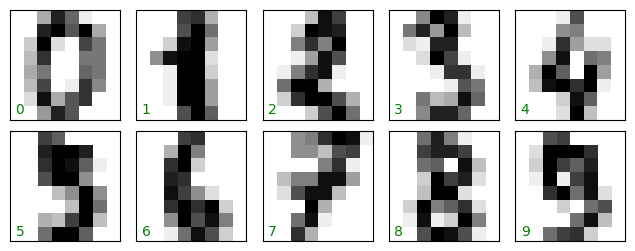

In [11]:
# Visualize the digit images
fig, axes = plt.subplots(2, 5, figsize=(8, 3),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [12]:
# Cluster the images using K-Means
kmeans_model = KMeans(n_clusters=10, random_state=0)
clusters = kmeans_model.fit_predict(digits.data)
clusters.shape

(1797,)

Let's visualize the cluster centers, which can be interpreted as a "typical" digit representative of each cluster

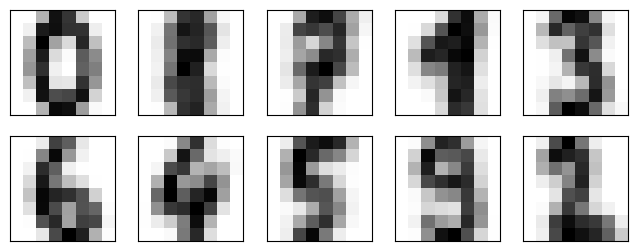

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans_model.cluster_centers_.reshape(10, 8, 8)
for ax, center in zip(ax.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

What if we didn't know the number of clusters that we wanted up-front?  We could use the "elbow method" to determine the best number of clusters

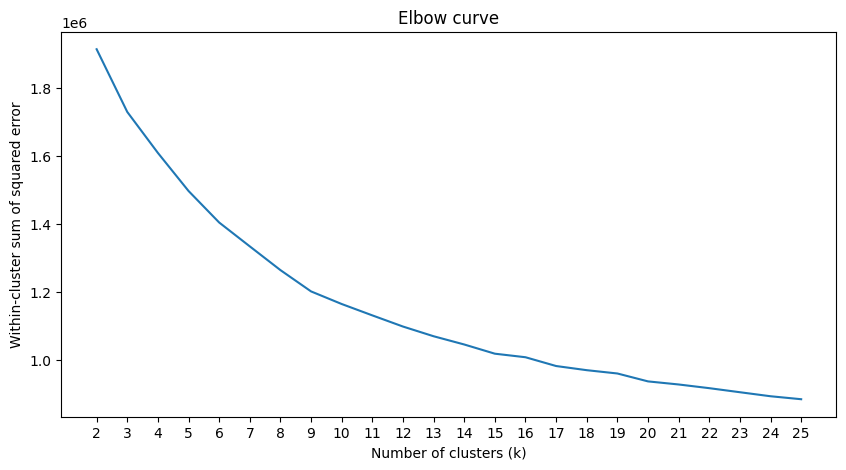

In [14]:
# Select number of clusters to use for KMeans clustering

wcss_list = list()
k_range = range(2,26)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(digits.data)
    wcss=0 # within cluster sum of squares
    # For each row, calculate distance to nearest centroid and add squared distance to wcss total
    for i in range(digits.data.shape[0]):
        distances = np.linalg.norm((digits.data[i] - km.cluster_centers_), ord=2, axis=1) # Calculate distances from centroids
        wcss += np.min(distances)**2 # Add squared distance from closest centroid
    wcss_list.append(wcss)

fig = plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss_list)
plt.title('Elbow curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squared error')
plt.xticks(k_range)
plt.show()

Let's evaluate our clustering performance by computing the silhouette score and Rand Index

In [15]:
from sklearn.metrics import adjusted_rand_score
labels_true = digits.target
labels_pred = clusters

# Calculate Silhouette Score
sil_score = silhouette_score(X=digits.data,labels=labels_pred)
print('Silhouette score is {:.3f}'.format(sil_score))

# Calculate Rand Index
rand_scr = adjusted_rand_score(labels_true,labels_pred)
print('Adjusted Rand Index is {:.3f}'.format(rand_scr))

Silhouette score is 0.183
Adjusted Rand Index is 0.666


#### Agglomerative Hierarchical clustering on digits

In [16]:
# Cluster the images using Agglomerative Clustering
ac_model = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='ward')
ac_clusters = ac_model.fit_predict(digits.data)

labels_true = digits.target
labels_pred = ac_clusters

# Calculate Rand Index
rand_scr = adjusted_rand_score(labels_true,labels_pred)
print('Adjusted Rand Index is {:.3f}'.format(rand_scr))

Adjusted Rand Index is 0.794


## Two Moons Example

Let's use a demonstration dataset that shows the power of DBSCAN relative to K-Means and Hierarchical Clustering.

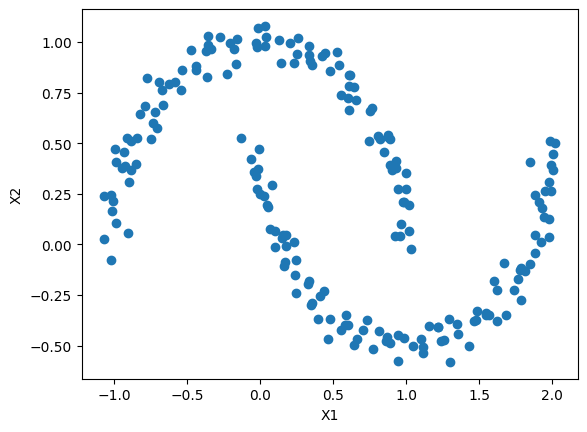

In [17]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### K-Means Model

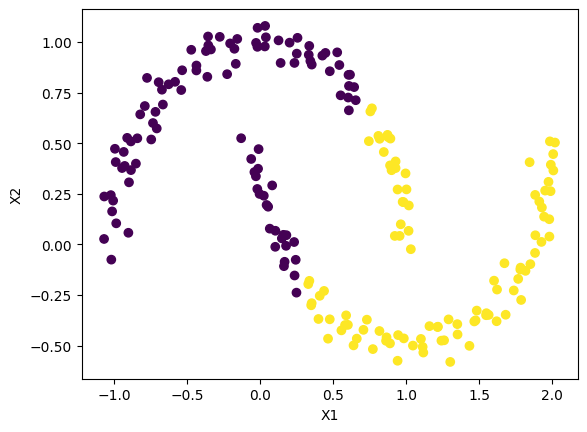

In [18]:
km_model = KMeans(n_clusters=2,random_state=0)
labels_km = km_model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels_km)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Hierarchical Clustering

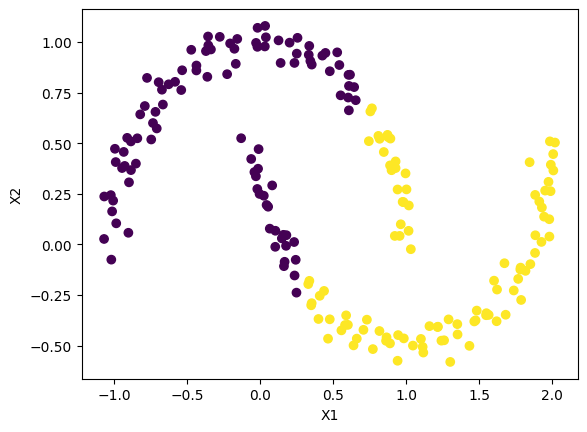

In [19]:
ag_model = AgglomerativeClustering(n_clusters=2,linkage='single')
labels_km = km_model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels_km)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### DBSCAN

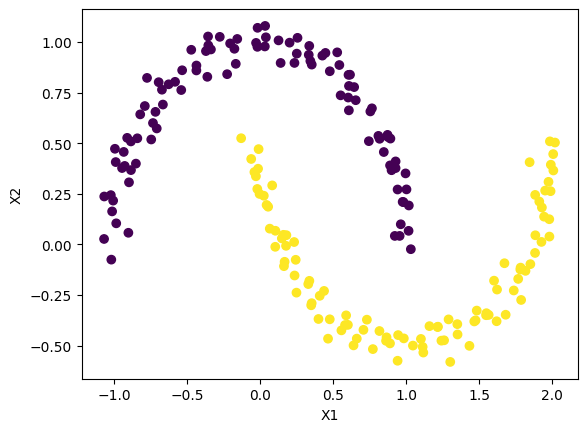

In [20]:
from sklearn.cluster import DBSCAN
db_model = DBSCAN(eps=0.2,min_samples=5)
labels_db = db_model.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=labels_db)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()